In [6]:
import numpy as np
import pickle
from sklearn.preprocessing import normalize
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# import zipfile
# with zipfile.ZipFile('./Acc_reg.zip', 'r') as zip_ref:
#     zip_ref.extractall('./')

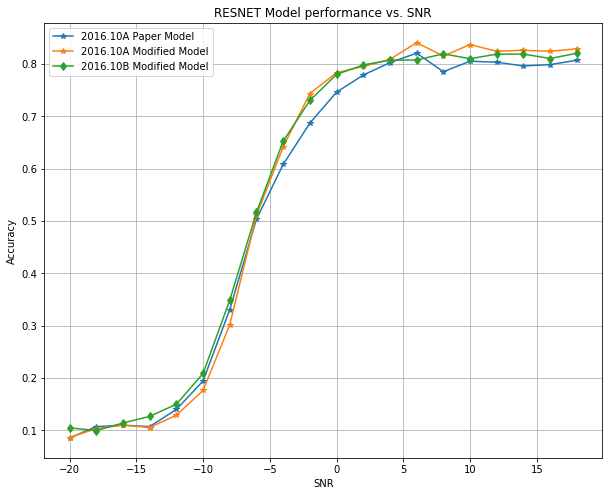

In [3]:
with open("accuracy_results-O", "rb") as fp:
    accuracy_results_paper_model = pickle.load(fp)
    
with open("accuracy_results-A", "rb") as fp:
    accuracy_results_maxpool_small = pickle.load(fp)
    
with open("accuracy_results-B", "rb") as fp:
    accuracy_results_maxpool_big = pickle.load(fp)
    
y = []
x = []

for i in range(len(accuracy_results_paper_model)):
    x.append(accuracy_results_paper_model[i][1])
x = sorted(x)


for i in x:
    for j in range(len(accuracy_results_paper_model)):
        if accuracy_results_paper_model[j][1]  == i:
            y.append(accuracy_results_paper_model[j][0])

fig = plt.figure(figsize=(10,8))            
plt.plot(x, y, marker='*', label='2016.10A Paper Model')    

    
y = []
x = []

for i in range(len(accuracy_results_maxpool_small)):
    x.append(accuracy_results_maxpool_small[i][1])
x = sorted(x)


for i in x:
    for j in range(len(accuracy_results_maxpool_small)):
        if accuracy_results_maxpool_small[j][1]  == i:
            y.append(accuracy_results_maxpool_small[j][0])

plt.plot(x, y, marker='*', label='2016.10A Modified Model')

y = []
x = []

for i in range(len(accuracy_results_maxpool_big)):
    x.append(accuracy_results_maxpool_big[i][1])
x = sorted(x)


for i in x:
    for j in range(len(accuracy_results_maxpool_big)):
        if accuracy_results_maxpool_big[j][1]  == i:
            y.append(accuracy_results_maxpool_big[j][0])


plt.plot(x, y, marker='d', label='2016.10B Modified Model')
plt.title('RESNET Model performance vs. SNR')
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.savefig("./Plots/Resnet_Accuracy.png")
plt.show()

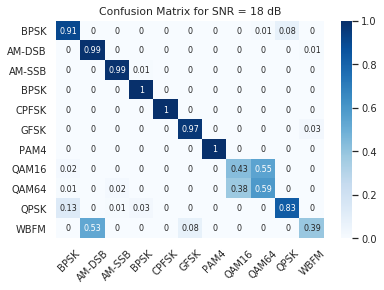

In [13]:
with open("confusion_matrix_results-A", "rb") as fp:
    confusion_matrix = pickle.load(fp)

# Extracting Confusion Matrix for SNR 18dB (Use different index for different SNR value)
# and Normalizing Confusion Matrix Values
normalized_confusion_matrix = normalize(confusion_matrix[18][0], norm='l1')
normalized_confusion_matrix = np.around(normalized_confusion_matrix, decimals = 2)


label_name = ["BPSK", "AM-DSB", "AM-SSB", "BPSK", "CPFSK", "GFSK", "PAM4", "QAM16", "QAM64", "QPSK", "WBFM"]
df_cm = pd.DataFrame(normalized_confusion_matrix, label_name, label_name)

sn.set(font_scale=0.9)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap="Blues")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) value
plt.xticks(ticks=[ 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], rotation=45)
plt.title('Confusion Matrix for SNR = 18 dB')
plt.savefig("./Plots/confusion_matrix_18dB.png")
plt.show()

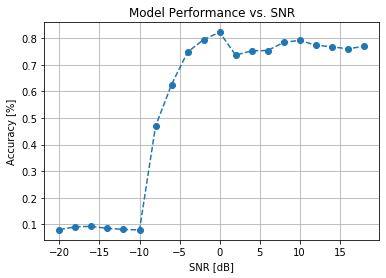

In [5]:
sorter(acc_reg)

In [6]:
with open('./Results/history_reg/SNR_2_history.pkl', 'rb') as file:
    history = pickle.load(file, encoding = 'latin')

In [7]:
history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

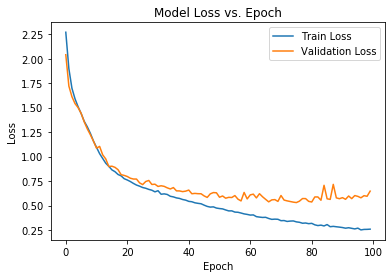

In [8]:
plt.plot(history['loss'], label = 'Train Loss')
plt.plot(history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss vs. Epoch')
plt.legend()

plt.show()

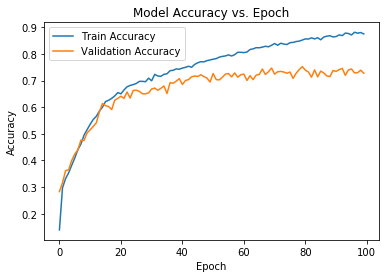

In [9]:
plt.plot(history['accuracy'], label = 'Train Accuracy')
plt.plot(history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Epoch')
plt.legend()

plt.show()

In [10]:
with open ('./class_dict' , 'rb') as file:
    classes = pickle.load(file, encoding ='latin')

In [11]:
with open('./Results/history_reg/SNR_8_prediction.pkl', 'rb') as file:
    y = pickle.load(file, encoding = 'latin')

In [12]:
y_pred = y['1']
y_true = y['2']

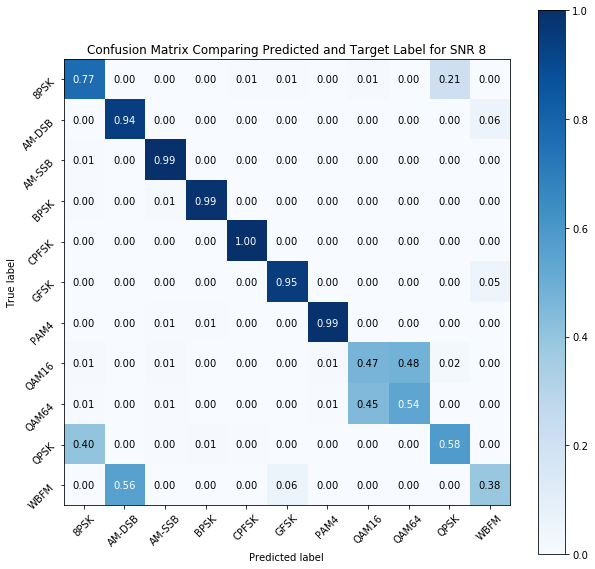

In [13]:
title = 'Confusion Matrix Comparing Predicted and Target Label for SNR 8'
confusion_matrix_create(y_true, y_pred, classes, title)

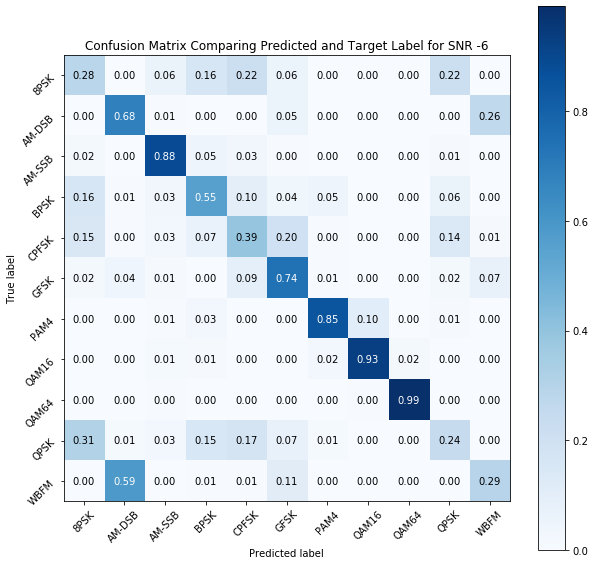

In [16]:
with open('./Results/history_reg/SNR_-6_prediction.pkl', 'rb') as file:
    y = pickle.load(file, encoding = 'latin')
    
y_pred = y['1']
y_true = y['2']
title = 'Confusion Matrix Comparing Predicted and Target Label for SNR -6'
confusion_matrix_create(y_true, y_pred, classes,title)

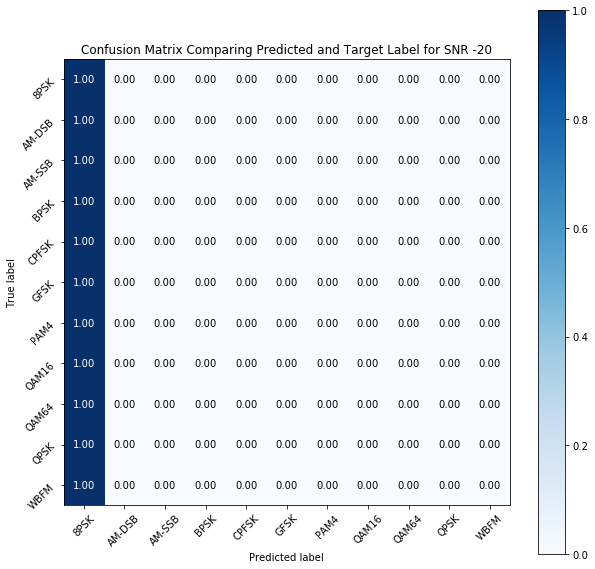

In [17]:
with open('./Results/history_reg/SNR_-20_prediction.pkl', 'rb') as file:
    y = pickle.load(file, encoding = 'latin')
    
y_pred = y['1']
y_true = y['2']
title = 'Confusion Matrix Comparing Predicted and Target Label for SNR -20'
confusion_matrix_create(y_true, y_pred, classes, title)

In [20]:
with open('./Results/Acc_BN/accuracy.pkl', 'rb') as file:
    acc_BN = pickle.load(file, encoding = 'Latin')

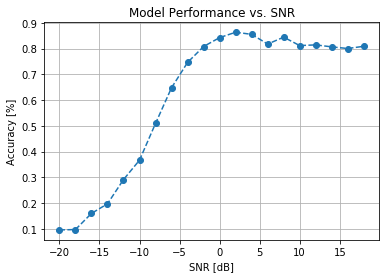

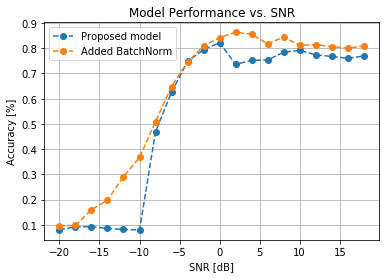

In [21]:
sorter(acc_BN)
sorter(acc_reg,acc_BN)

In [22]:
# y = []
# x = []
# for i in range(len(dataset1)):
#     x.append(dataset1[i][1])
# x = sorted(x)


# for i in x:
#     for j in range(len(dataset1)):
#         if dataset1[j][1]  == i:
#             y.append(dataset1[j][0])

In [24]:
# for i in x:
#     with open('./Results/history_reg/SNR_{}_history.pkl'.format(i), 'rb') as file:
#         dataset2 = pickle.load(file, encoding = 'Latin')
#     fig = plt.figure(i)    
#     plt.plot(dataset2['loss'])
#     plt.plot(dataset2['val_loss'])
#     plt.show()


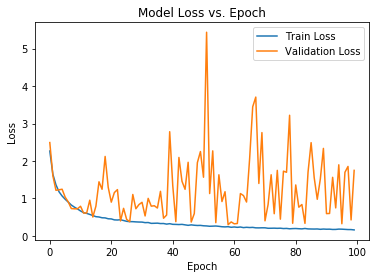

In [25]:
with open('./Results/history_BN/SNR_2_history.pkl', 'rb') as file:
    history = pickle.load(file, encoding = 'latin')

plt.plot(history['loss'], label = 'Train Loss')
plt.plot(history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss vs. Epoch')
plt.legend()

plt.show()

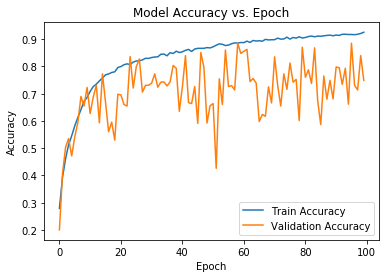

In [26]:
plt.plot(history['accuracy'], label = 'Train Accuracy')
plt.plot(history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Epoch')
plt.legend()

plt.show()

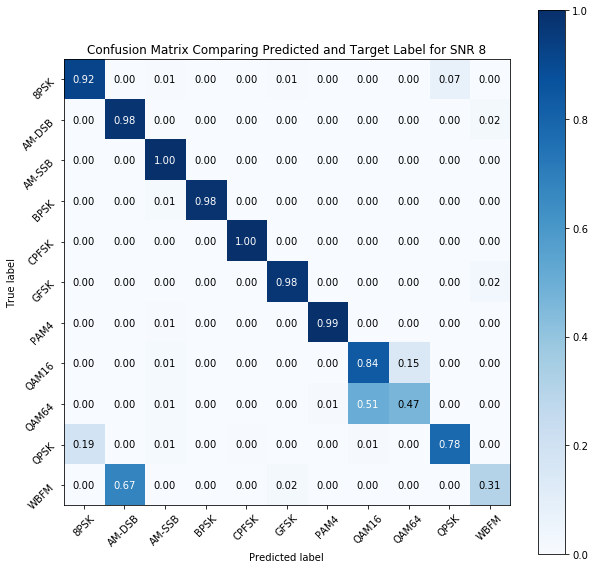

In [28]:
with open('./Results/history_BN/SNR_8_prediction.pkl', 'rb') as file:
    y = pickle.load(file, encoding = 'latin')
    
y_pred = y['1']
y_true = y['2']
title = 'Confusion Matrix Comparing Predicted and Target Label for SNR 8'
confusion_matrix_create(y_true, y_pred, classes, title)

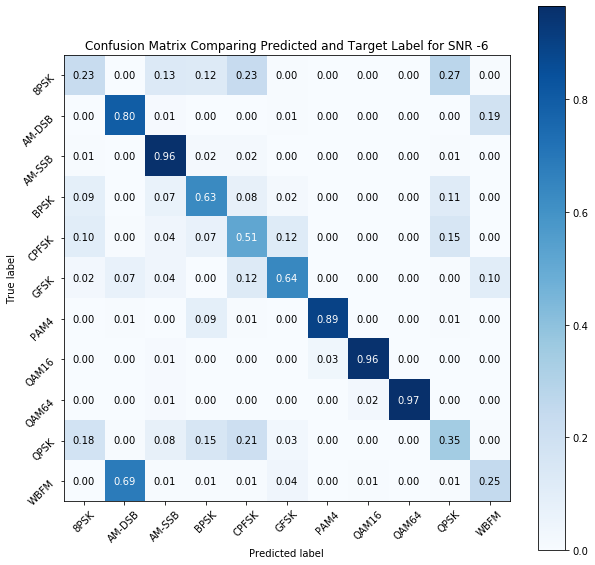

In [29]:
with open('./Results/history_BN/SNR_-6_prediction.pkl', 'rb') as file:
    y = pickle.load(file, encoding = 'latin')
    
y_pred = y['1']
y_true = y['2']
title = 'Confusion Matrix Comparing Predicted and Target Label for SNR -6'
confusion_matrix_create(y_true, y_pred, classes, title)

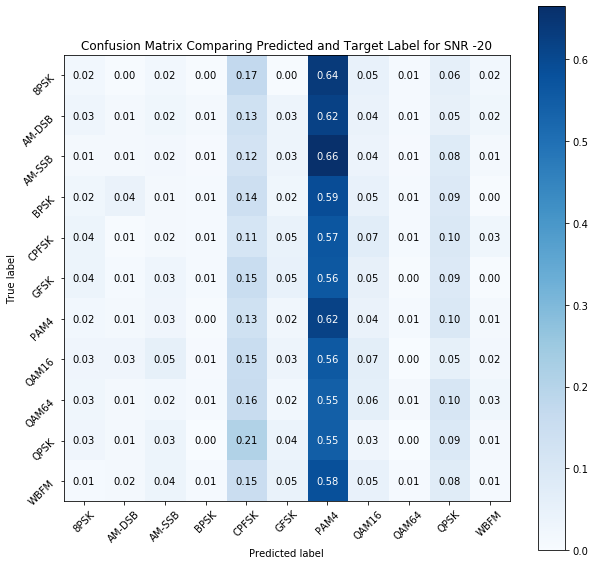

In [30]:
with open('./Results/history_BN/SNR_-20_prediction.pkl', 'rb') as file:
    y = pickle.load(file, encoding = 'latin')
    
y_pred = y['1']
y_true = y['2']
title = 'Confusion Matrix Comparing Predicted and Target Label for SNR -20'
confusion_matrix_create(y_true, y_pred, classes, title)